## Flight Price Prediction

In [190]:
from IPython.display import Image
Image(url= "https://images.moneycontrol.com/static-mcnews/2017/02/Aviation_aeroplane_aircraft_airlines-1-630x420.jpg?impolicy=website&width=770&height=431")

# 1. Introduction

#### The tourism industry is changing fast and this is attracting a lot more travelers each year. The airline industry is considered as one of the most sophisticated industry in using complex pricing strategies. Now-a-days flight prices are quite unpredictable. The ticket prices change frequently. Customers are seeking to get the lowest price for their ticket, while airline companies are trying to keep their overall revenue as high as possible. Using technology it is actually possible to reduce the uncertainty of flight prices. So here we will be predicting the flight prices using efficient machine learning techniques.

# 2.Dataset Information

#### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, and it will be a different story.
#### To solve this problem, we have been provided with prices of flight tickets for various airlines between  between various cities, using which we aim to build a model which predicts the prices of the flights using various input features.
#### In This Dataset I have to Predict Flight Prices label.

# 3. Details about the dataset

### Following is the description of features available in the dataset –
##### 1. Airline: The name of the airline.
##### 2. Date_of_Journey: The date of the journey
##### 3. Source: The source from which the service begins.
##### 4. Destination: The destination where the service ends.
##### 5. Route: The route taken by the flight to reach the destination.
##### 6. Dep_Time: The time when the journey starts from the source.
##### 7. Arrival_Time: Time of arrival at the destination.
##### 8. Duration: Total duration of the flight.
##### 9. Total_Stops: Total stops between the source and destination.
##### 10. Additional_Info: Additional information about the flight
##### 11. Price: The price of the ticket

# 4.Importing All Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#n for models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 5. Loading excel data

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that Price is thelabel columns while remaning are the Features columns.

# 6.EDA - Exploratory Data Analysis

#### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [3]:
df.shape

(10683, 11)

#### By using shape I got 7752 rows and 25 columns.

In [4]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Also, most of the column are object in nature and Price is of int64 data type.

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(10463, 11)

#### After using dupllicates I can see there is no duplicate value in this dataset.

In [7]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

#### By Using nunique I got an idea of continuous & Categorical Columns.
#### As in this Dataset most of the columns are continuous to predict Flight Price Prediction.

# 7. Data Visualizations

## Data visualization
#### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.

##### According to my perception I have done below Data visualization in this Project.

#### Strip Plot
##### A strip plot is a graphical data anlysis technique for summarizing a univariate data set.A strip chart is handy when taking a look at a small set of one-dimensional data. It shows all the data, and since there aren't too many points cluttering the plot, it is informative.A strip is basically a scatter plot where the x axis represents a categorical variable While Y represents Label Column of the Dataset.
#### Cat Plot
##### Catplot shows frequencies of the categories of one, two or three categorical variables.This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
#### Histogram Plot
##### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.
#### Distribution Plot
##### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.
#### Countplot
##### Countplot() function for visualizing data of your machine learning or data science project. The countplot is majorly used for showing the observational count in different category based bins with the help of bars. The main idea of the count plot is similar to barplot() function.

### Handling Categorical Data

### Airline vs Price

In [8]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

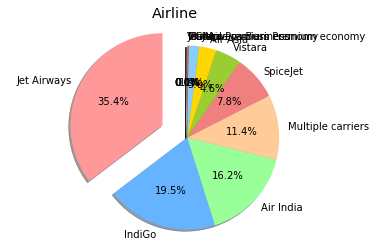

<Figure size 1080x720 with 0 Axes>

In [9]:
#  pie plot of Airline 

labels = ['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet', 'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy', 'Trujet']
value = [3700, 2043, 1698, 1196, 815, 478, 319, 194, 13, 6, 3, 1]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','lightcoral','yellowgreen','gold','lightskyblue', 'red','orange','green', 'blue']
explode = [0.3,0,0,0,0,0,0,0,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Airline')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Airline'>

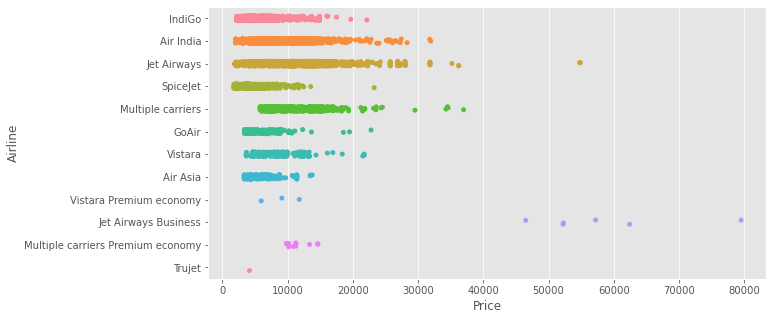

In [16]:
plt.figure(figsize=(10,5))
sns.stripplot(df['Price'],df['Airline'])

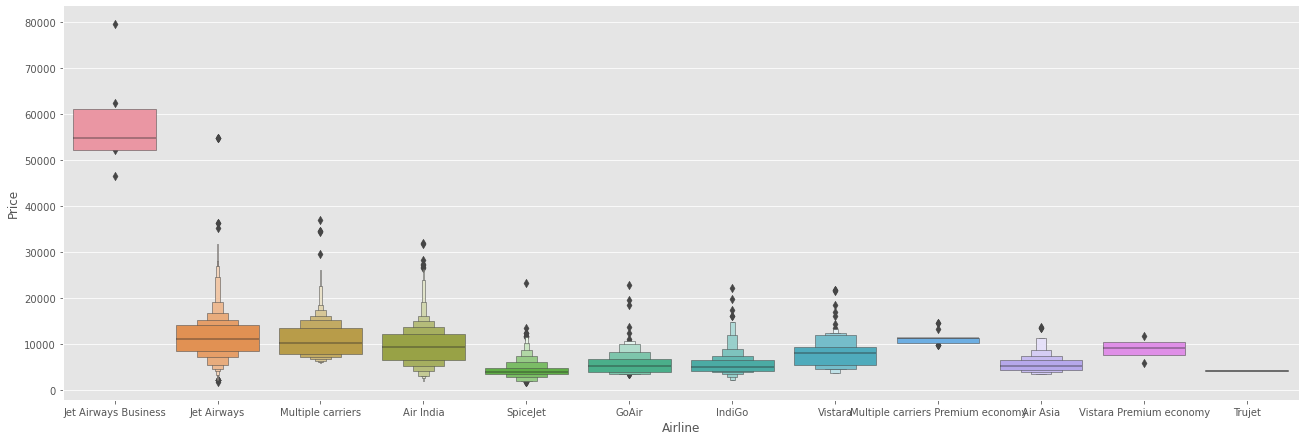

In [18]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### From the above plots and charts I can see Jet Airways flight prices are more higher rather than others in this dataset.

### Source vs Price

In [17]:
df['Source'].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

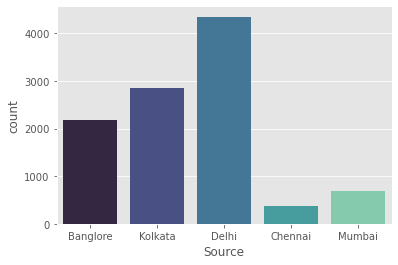

In [27]:
sns.countplot(df['Source'], palette = 'mako',  data = df);

<AxesSubplot:xlabel='Source', ylabel='Price'>

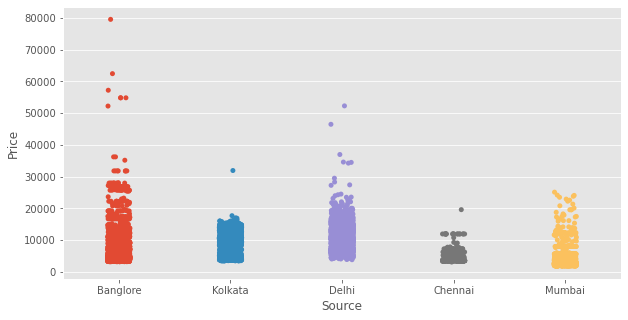

In [14]:
plt.figure(figsize=(10,5))
sns.stripplot(df['Source'],df['Price'])

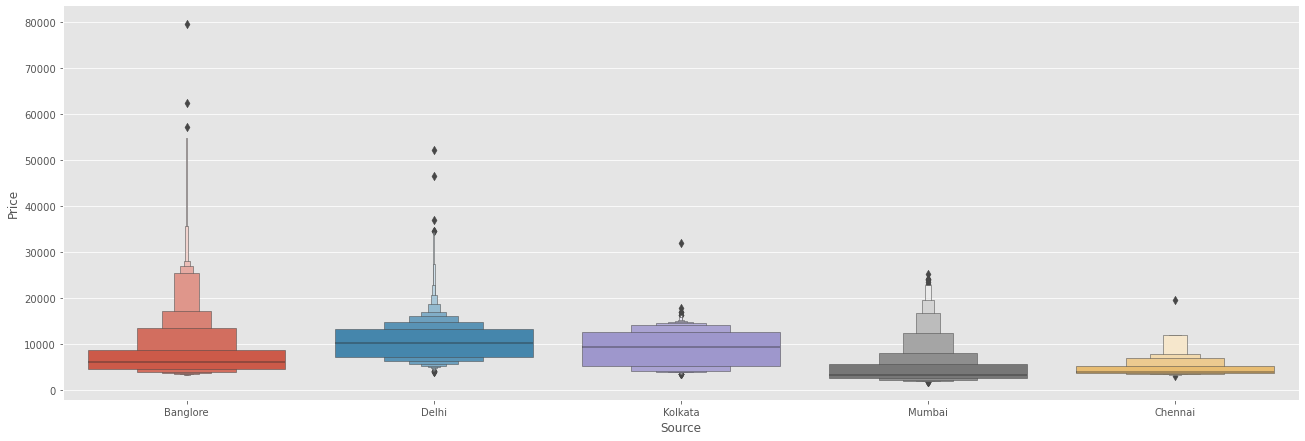

In [19]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### From the above plots and charts I can see Delhi flight prices are more higher and demanding rather than others cities in this dataset.

### Destination vs Price

In [29]:
df['Destination'].value_counts()

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

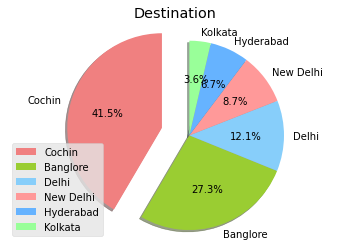

In [31]:
#  pie plot of Destination 

labels = ['Cochin', 'Banglore', 'Delhi','New Delhi', 'Hyderabad', 'Kolkata']
value = [4346, 2860, 1265, 914, 697, 381]
colors = ['lightcoral','yellowgreen','lightskyblue','#ff9999','#66b3ff','#99ff99']
explode = [0.3,0,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Destination')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower left')
plt.show()

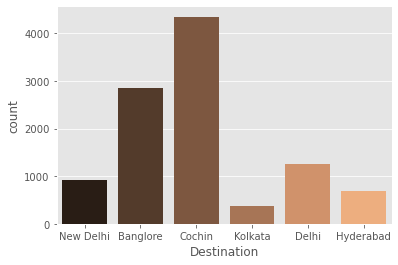

In [32]:
sns.countplot(df['Destination'], palette = 'copper',  data = df);

<AxesSubplot:xlabel='Destination', ylabel='Price'>

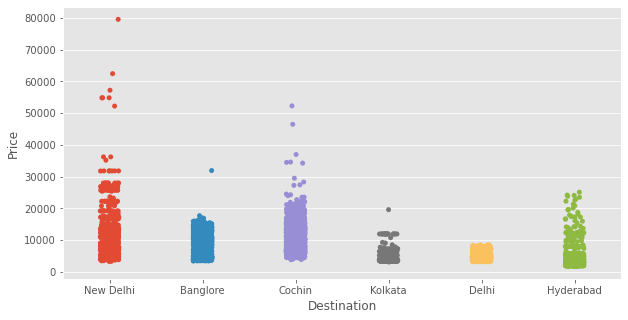

In [17]:
plt.figure(figsize=(10,5))
sns.stripplot(df['Destination'],df['Price'])

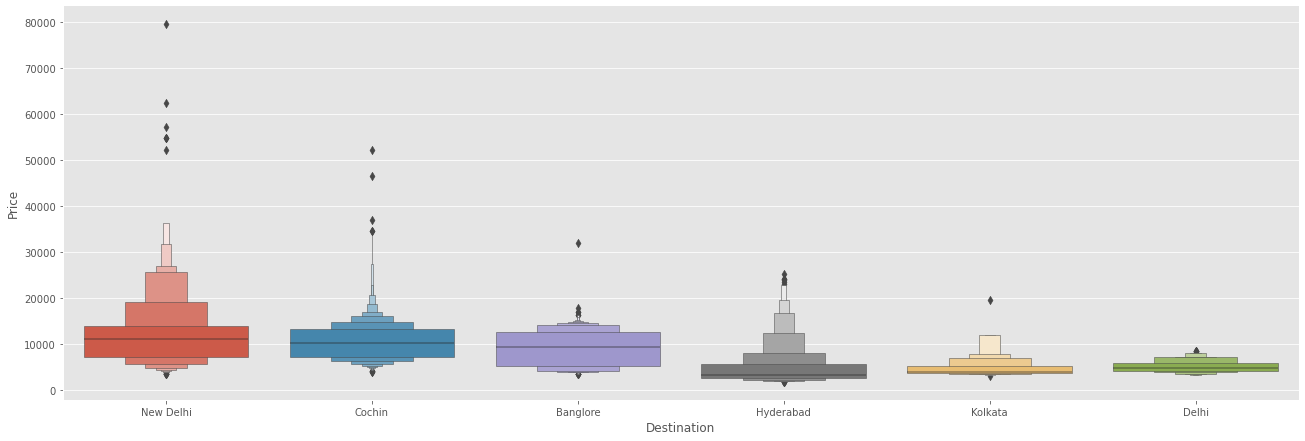

In [20]:
# Destination vs Price
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### From the above plots and charts I can see Coachin  flight destination prices are 4346 higher and demanding rather than others cities in this dataset.

#### Total_Stops vs Price

In [35]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

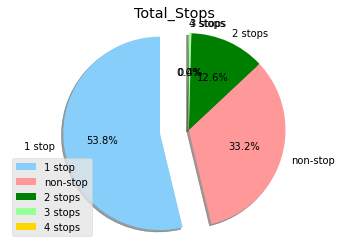

In [37]:
#  pie plot of Total_Stops 

labels = ['1 stop', 'non-stop', '2 stops','3 stops', '4 stops']
value = [5625, 3475, 1318, 43, 1]
colors = ['lightskyblue','#ff9999','green','#99ff99','gold']
explode = [0.3,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Total_Stops')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower left')
plt.show()

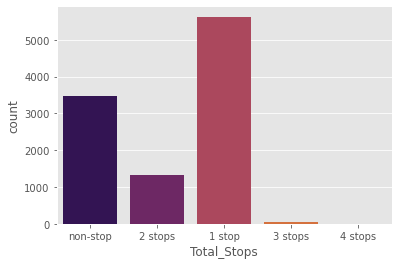

In [38]:
sns.countplot(df['Total_Stops'], palette = 'inferno',  data = df);

<AxesSubplot:xlabel='Total_Stops', ylabel='Airline'>

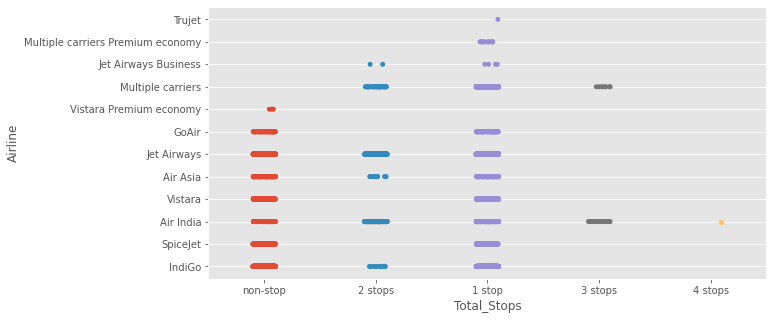

In [39]:
plt.figure(figsize=(10,5))
sns.stripplot(df['Total_Stops'],df['Airline'])

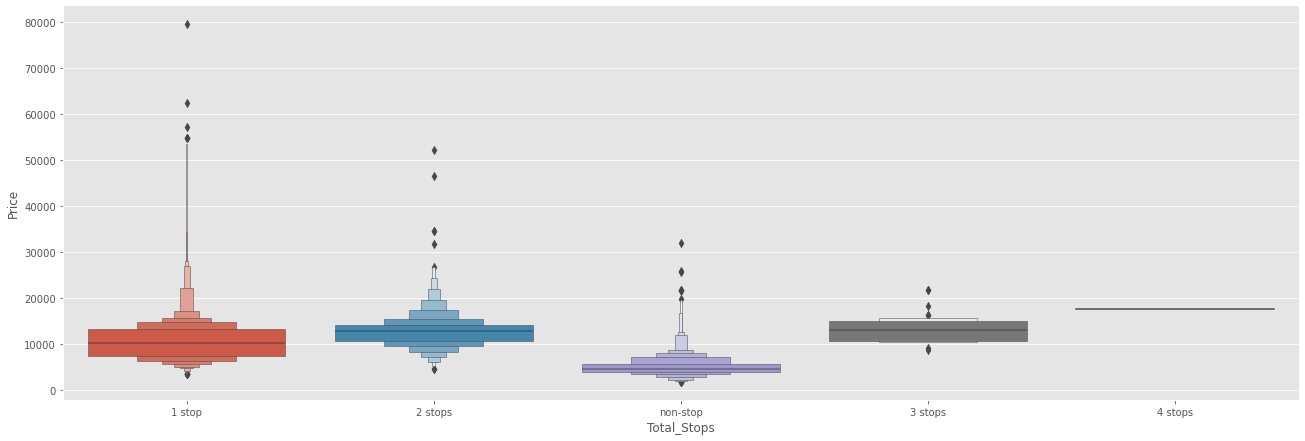

In [21]:
# Total_Stops vs Price
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### Basically in flights in India there are mostly 1 stop of halt in the aircrafts.

# Handling Continious Data

# Converting String & Object columns into Integer

In [8]:
# I have converted Date_of_Journey column into integers
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

# Since i have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### I can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.

#### For this we require pandas to_datetime to convert object data type to datetime dtype.

#### .dt.day method will extract only day of that date

#### .dt.month method will extract only month of that date

#### Since Date_of_Journey is divided into Journey_day and Journey_month so dropping the Date_of_Journey columns as it is of no use.

##### Journey_day vs Price

In [9]:
df['Journey_day'].value_counts()

9     1375
6     1269
27    1092
21    1085
1     1058
24    1022
15     967
12     946
3      835
18     814
Name: Journey_day, dtype: int64

<AxesSubplot:xlabel='Journey_day'>

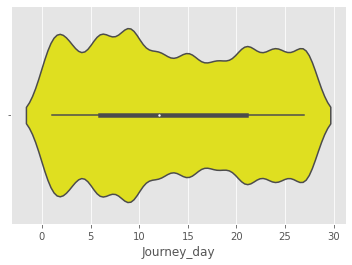

In [42]:
sns.violinplot(x=df['Journey_day'], inner = "box",color='yellow')

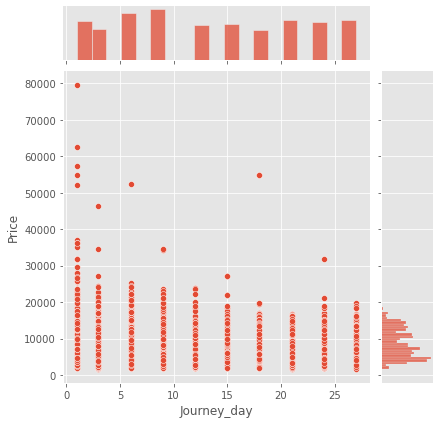

In [43]:
sns.jointplot(df['Journey_day'],df['Price'])

#### Journey_month vs Price

In [10]:
df['Journey_month'].value_counts()

5    3396
6    3311
3    2678
4    1078
Name: Journey_month, dtype: int64

<AxesSubplot:xlabel='Journey_month'>

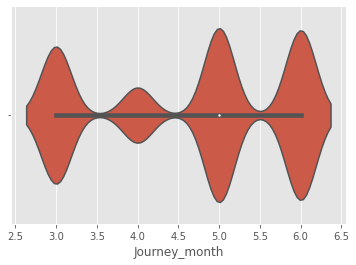

In [13]:
sns.violinplot(x=df['Journey_month'], inner = "box")

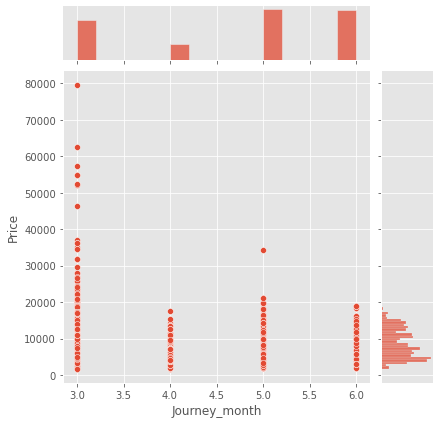

In [22]:
sns.jointplot(df['Journey_month'],df['Price'])

#### Separate the column “Date_of_Journey” into “journey_day” and “journey_month” to help our machine learning model understand and use the column for prediction. After doing so we will delete the “Date_of_Journey” column which will no longer be useful to us.

### Departure time 

In [11]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

#### I can see that Dep_Time is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
#### For this we require pandas to_datetime to convert object data type to datetime dtype.
#### .dt.hour method will extract only hour of the time.
#### .dt.minute method will extract only minute of the time
#### Since Dep_Time is divided into Dep_hour and Dep_min so dropping the Dep_Time columns as it is of no use.

#### Dep_hour vs Price

In [12]:
df['Dep_hour'].value_counts()

9     887
7     863
8     694
17    689
6     675
20    649
5     582
11    579
19    544
10    527
14    505
21    489
16    461
18    441
13    411
22    373
15    319
2     194
12    178
4     169
23    133
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

<AxesSubplot:xlabel='Dep_hour'>

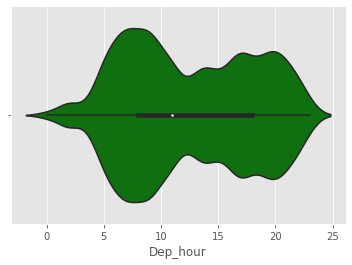

In [46]:
sns.violinplot(x=df['Dep_hour'], inner = "box",color='green')

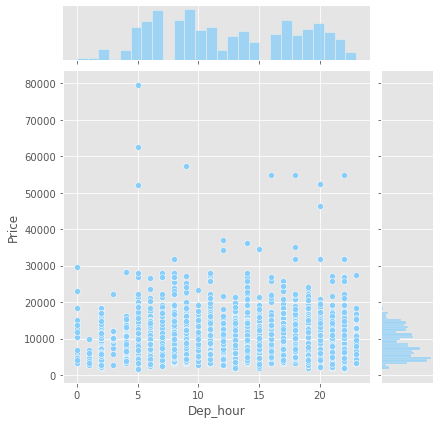

In [47]:
sns.jointplot(df['Dep_hour'],df['Price'],color='lightskyblue')

#### Dep_min vs Price

In [13]:
df['Dep_min'].value_counts()

0     2039
30    1173
55    1052
10     870
45     858
5      740
15     684
25     679
20     664
35     645
50     586
40     473
Name: Dep_min, dtype: int64

<AxesSubplot:xlabel='Dep_min'>

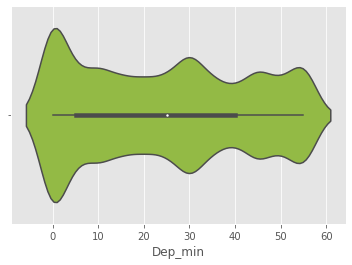

In [49]:
sns.violinplot(x=df['Dep_min'], inner = "box",color='yellowgreen')

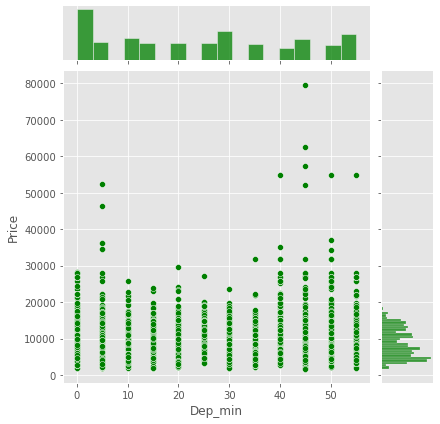

In [50]:
sns.jointplot(df['Dep_min'],df['Price'],color='green')

#### Now we will be dealing with the “ Dep_time”  feature because the machine learning model won’t be able to understand what the time is or what day it is. We will be fetching minutes and hours from both these columns 

### Arrival_Time

In [14]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

#### I can see that Arrival_Time is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
#### For this we require pandas to_datetime to convert object data type to datetime dtype.
#### .dt.hour method will extract only hour of the time.
#### .dt.minute method will extract only minute of the time
#### Since Arrival_Time is divided into Arrival_hour and Arrival_min so dropping the Arrival_Time columns as it is of no use.

##### Arrival_hour vs Price

In [15]:
df['Arrival_hour'].value_counts()

19    1554
12     861
4      761
21     701
22     646
1      525
18     509
9      490
23     481
10     474
8      468
7      414
20     377
16     370
0      322
13     303
11     297
14     294
17     191
15     182
2       79
5       66
6       51
3       47
Name: Arrival_hour, dtype: int64

<AxesSubplot:xlabel='Arrival_hour'>

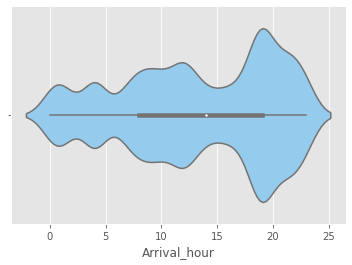

In [52]:
sns.violinplot(x=df['Arrival_hour'], inner = "box",color='lightskyblue')

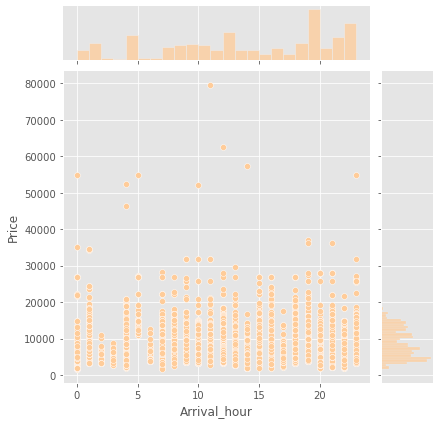

In [54]:
sns.jointplot(df['Arrival_hour'],df['Price'],color='#ffcc99')

#### Now we will be dealing with the and Arrival_Time” feature because the machine learning model won’t be able to understand what the time is or what day it is. We will be fetching minutes and hours from both these columns

## Duration

In [16]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [17]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

# dropping duration columns
df.drop(["Duration"], axis = 1, inplace = True)

#### I can see that Duration is a object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
#### I am Assigning and converting Duration column into list.
#### Since Duration is divided into Duration_hours and Duration_mins so dropping the Duration columns as it is of no use.

#### Duration_hours vs Price

In [18]:
df['Duration_hours'].value_counts()

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     241
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
35       7
34       7
31       6
36       5
47       2
42       2
40       1
41       1
39       1
0        1
Name: Duration_hours, dtype: int64

<AxesSubplot:xlabel='Duration_hours'>

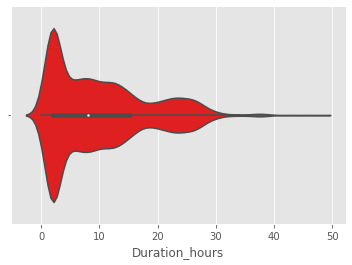

In [59]:
sns.violinplot(x=df['Duration_hours'], inner = "box",color='red')

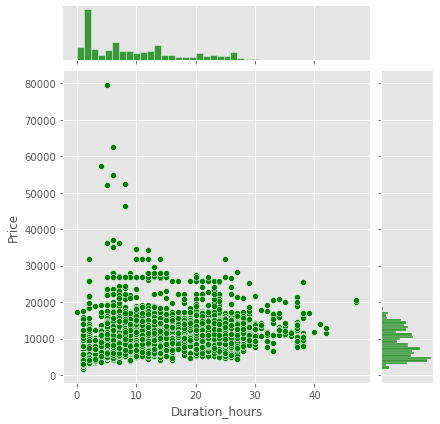

In [60]:
sns.jointplot(df['Duration_hours'],df['Price'],color='green')

#### Duration_mins vs Price

In [19]:
df['Duration_mins'].value_counts()

30    1421
0     1005
20     979
50     950
35     930
15     884
45     874
55     856
25     801
40     623
5      620
10     520
Name: Duration_mins, dtype: int64

<AxesSubplot:xlabel='Duration_mins'>

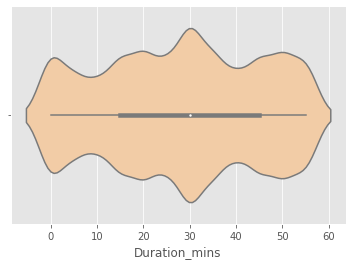

In [61]:
sns.violinplot(x=df['Duration_mins'], inner = "box",color='#ffcc99')

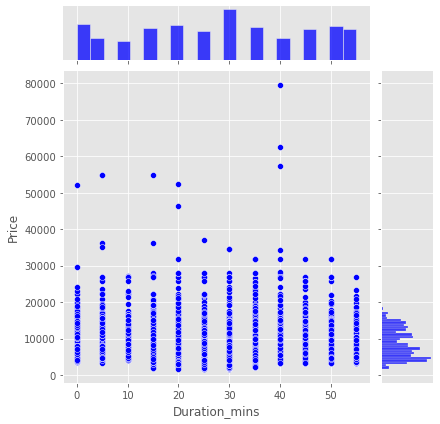

In [62]:
sns.jointplot(df['Duration_mins'],df['Price'],color='blue')

#### Now we will be processing the “Duration” column as in some cases there is no Hour(hr) term or minutes (m) term in the colum. We will be using the split function and then append ‘0h’ or ‘0m’ wherever needed.

In [15]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### After dividing few columns from the dataset now i can 15 columns out of which 6 columns is still in string data type.

In [16]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### Additional_Info contains almost 80% no_info
#### Route and Total_Stops are related to each other
#### So dropping the Route, Additional_Info column from the dataset.

In [17]:
df.shape

(10463, 13)

#### There are 10463 rows and 13 columns in dataset.

In [18]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


#### Ther are 4 columns such as Airline,Source,Destination and Total_Stops are in string.
#### So I will be using label encoder to convert those columns into integers.

## Label Encoder

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [19]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
le = LabelEncoder()
df.Airline = le.fit_transform(df.Airline)
df.Source = le.fit_transform(df.Source)
df.Destination = le.fit_transform(df.Destination)
df.Total_Stops = le.fit_transform(df.Total_Stops)

In [20]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,13302,1,3,16,50,21,35,4,45


In [21]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
dtype: int64

In [22]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline         10463 non-null  int32
 1   Source          10463 non-null  int32
 2   Destination     10463 non-null  int32
 3   Total_Stops     10463 non-null  int32
 4   Price           10463 non-null  int64
 5   Journey_day     10463 non-null  int64
 6   Journey_month   10463 non-null  int64
 7   Dep_hour        10463 non-null  int64
 8   Dep_min         10463 non-null  int64
 9   Arrival_hour    10463 non-null  int64
 10  Arrival_min     10463 non-null  int64
 11  Duration_hours  10463 non-null  int64
 12  Duration_mins   10463 non-null  int64
dtypes: int32(4), int64(9)
memory usage: 980.9 KB


#### After applying Lable Encoder now i can see that all the columns in the dataset is in integers time.

In [23]:
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.00000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,3.980789,1.953646,1.439453,1.463443,9026.642454,13.462487,4.70152,12.478161,24.406958,13.387269,24.719966,10.027430,28.211316
std,2.364693,1.186270,1.480950,1.821613,4624.653227,8.467403,1.16375,5.727055,18.815897,6.855353,16.569658,8.378582,16.878771
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,5224.000000,6.000000,3.00000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,0.000000,8266.000000,12.000000,5.00000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,4.000000,12343.500000,21.000000,6.00000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,5.000000,79512.000000,27.000000,6.00000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


#### Now I can see that total number of counts in each columns is same.
#### There is difference between mean and 50% that need to be taken care.
#### There are zero value in min rows that need to be taken care.

# Histogram plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
#### THe following are some of the characteristics of histograms:
##### a)provides us a count of the number of observations in each bin created for visualization.
##### b)From the shape of the bin, I can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.
##### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Total_Stops'}>],
       [<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>,
        <AxesSubplot:title={'center':'Dep_hour'}>],
       [<AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>,
        <AxesSubplot:title={'center':'Arrival_min'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>],
       [<AxesSubplot:title={'center':'Duration_mins'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

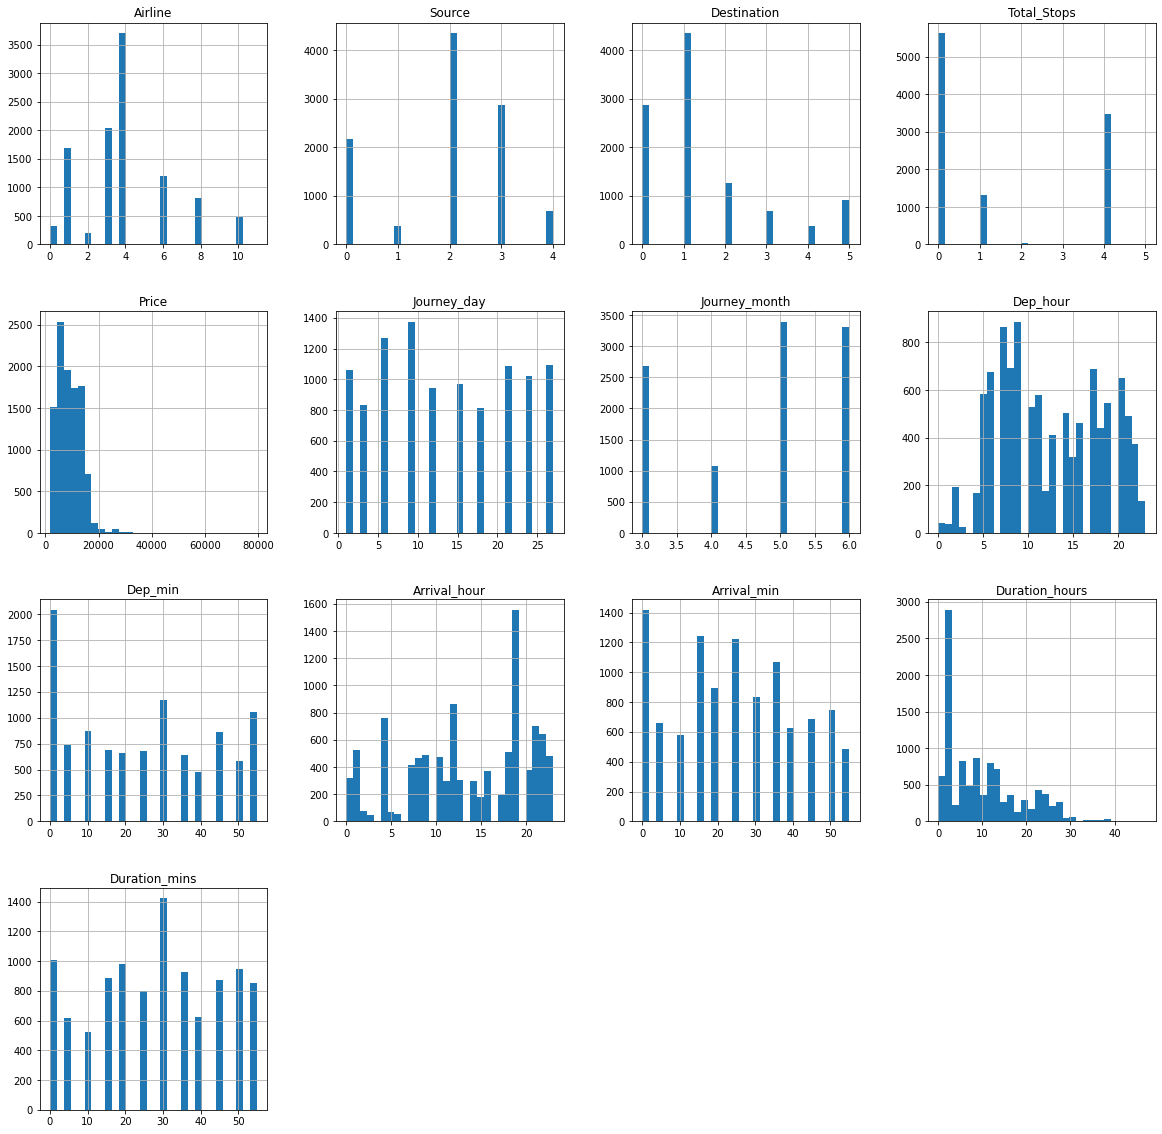

In [24]:
# using the the histogrom plot 

df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

#### By making Histogram Plot I can see there are some skewness in this dataset.
#### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

## Distribution Plot

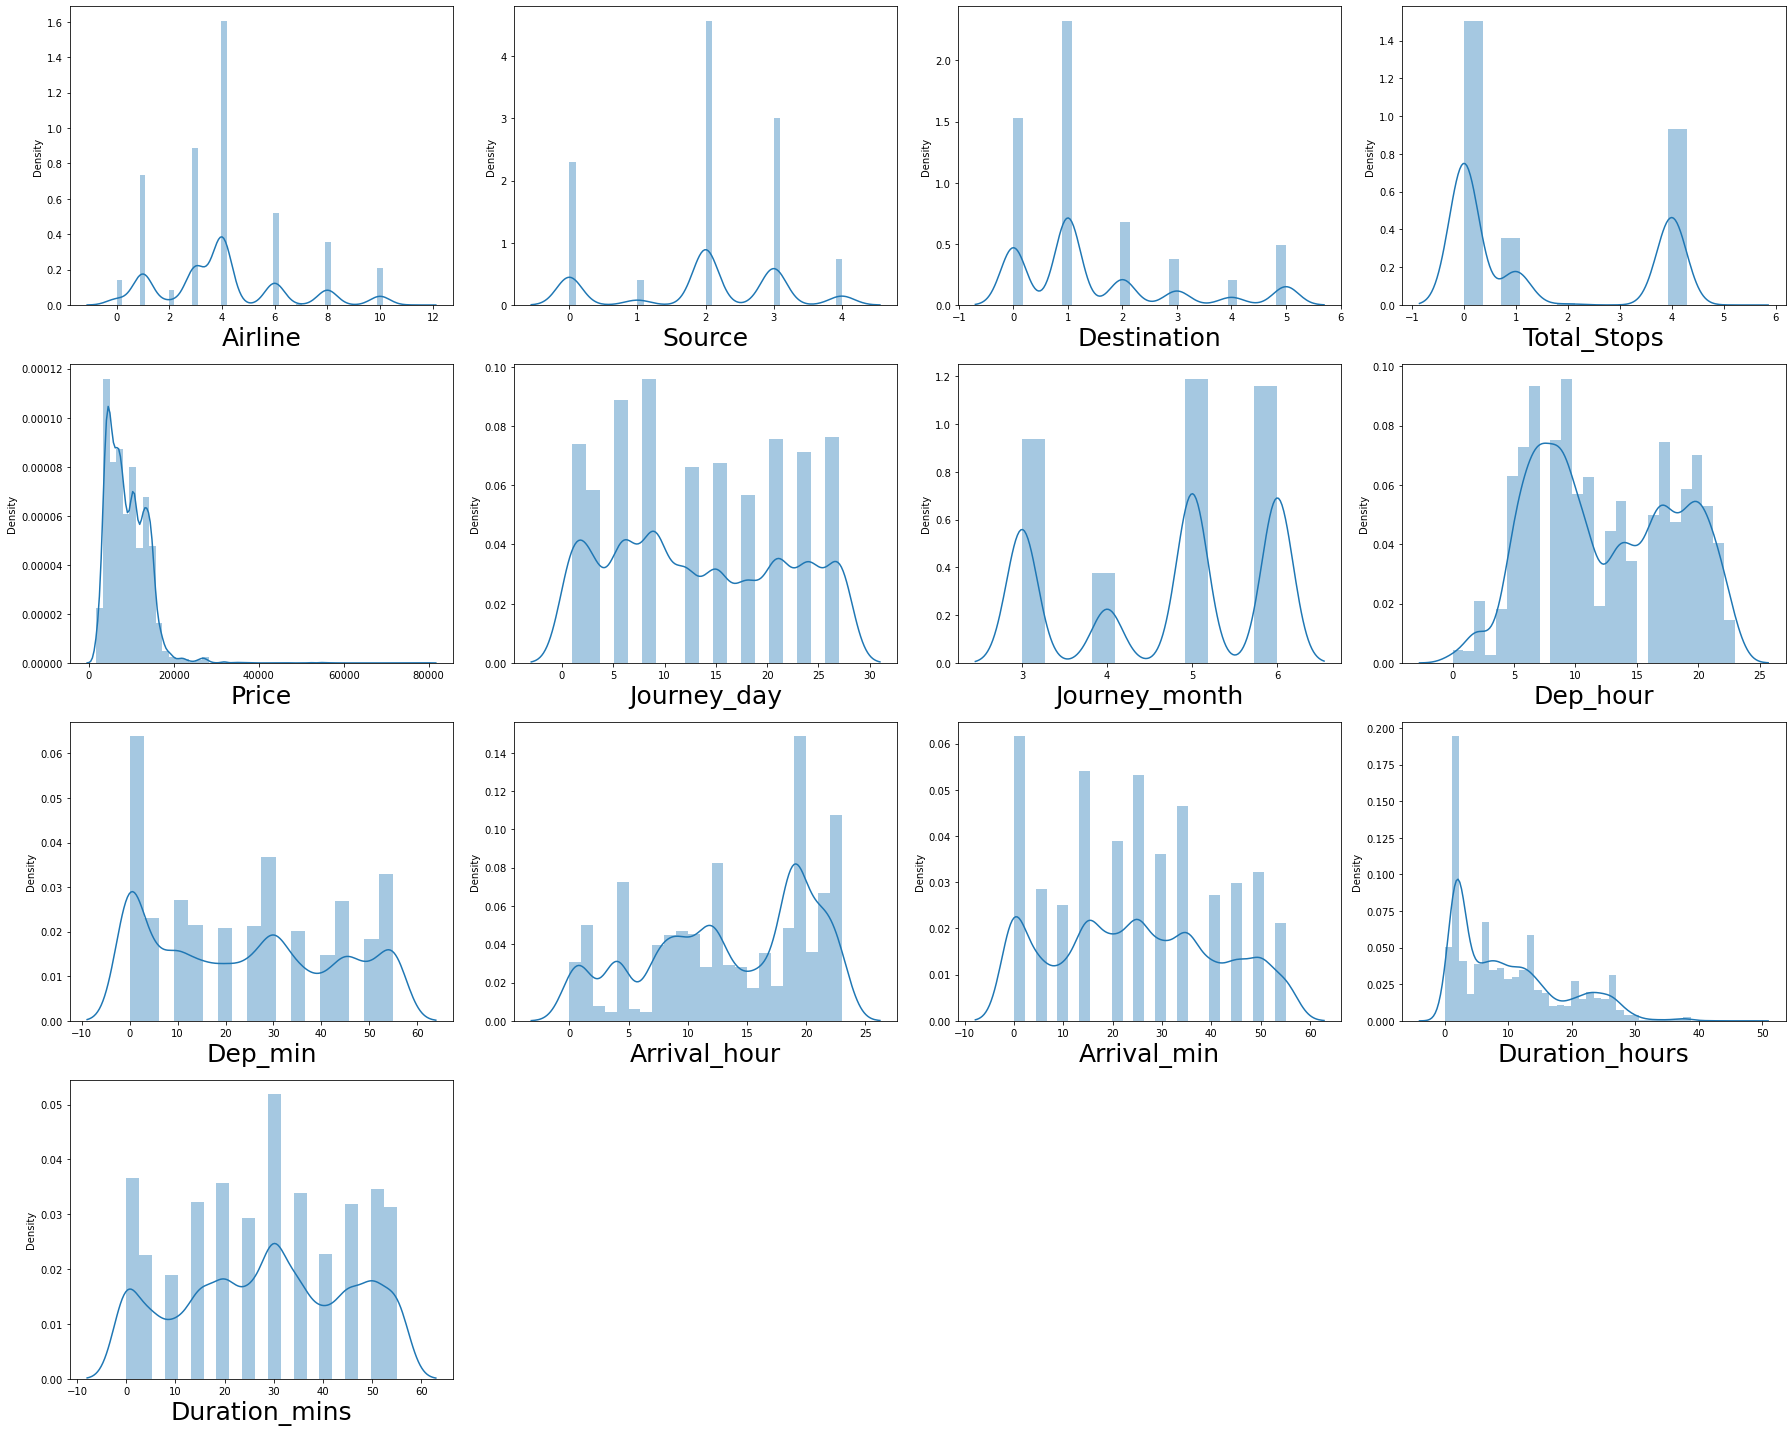

In [25]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### From the above Distribution Plot I can see that there are skewness in this dataset.

## Replacing all the zero values from different columns

In [26]:
# Replacing continous columns with mean
df['Dep_hour']=df['Dep_hour'].replace(0,df['Dep_hour'].mean())
df['Dep_min']=df['Dep_min'].replace(0,df['Dep_min'].mean())
df['Arrival_hour']=df['Arrival_hour'].replace(0,df['Arrival_hour'].mean())
df['Arrival_min']=df['Arrival_min'].replace(0,df['Arrival_min'].mean())
df['Duration_hours']=df['Duration_hours'].replace(0,df['Duration_hours'].mean())
df['Duration_mins']=df['Duration_mins'].replace(0,df['Duration_mins'].mean())

#### There are few zero values in the above cloumns that is replaced with mean.

## Box Plot

Airline               AxesSubplot(0.125,0.71587;0.168478x0.16413)
Source             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Destination        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Total_Stops        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Price                AxesSubplot(0.125,0.518913;0.168478x0.16413)
Journey_day       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Journey_month     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Dep_hour          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Dep_min              AxesSubplot(0.125,0.321957;0.168478x0.16413)
Arrival_hour      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Arrival_min       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Duration_hours    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Duration_mins           AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

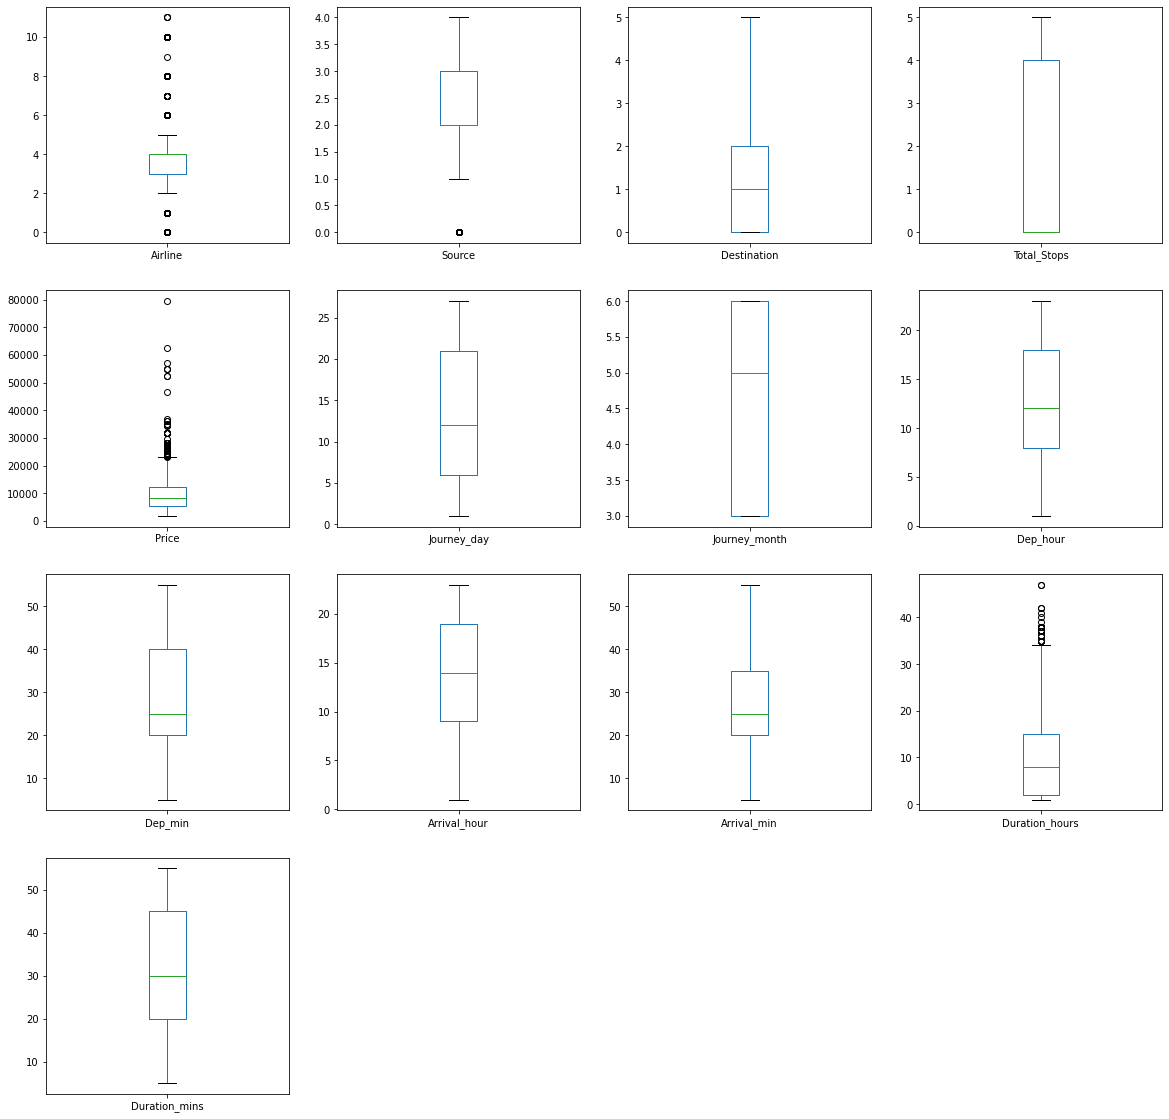

In [27]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

#### From above image I can clear see that there are few number of black dots in  the column which are referring to the outliers, so it means most of the data are outside the distribution.
#### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.
#### There are outliers in Duration_hours,Price which is continous in nature.

## Z score

In [28]:
z_score = zscore(df[['Duration_hours','Price']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000
mean,3.993597,1.965852,1.415308,1.475747,8811.150757,13.560924,4.722352,12.562201,29.097050,13.776968,28.099495,9.844783,30.994955
std,2.371109,1.181746,1.458892,1.829995,4061.260145,8.430454,1.155234,5.663605,14.637875,6.431762,13.437356,8.133227,14.193786
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000
25%,3.000000,2.000000,0.000000,0.000000,5198.000000,6.000000,4.000000,8.000000,20.000000,9.000000,20.000000,2.000000,20.000000
50%,4.000000,2.000000,1.000000,0.000000,8073.000000,12.000000,5.000000,12.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,4.000000,12199.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,5.000000,22798.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,35.000000,55.000000


In [29]:
df.shape

(10308, 13)

#### I am using zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.
#### So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
#### After, removing the outlier’s final there are 10308 and 13 column presents in the data set.

# After Removing Skewness making Distribution Plot

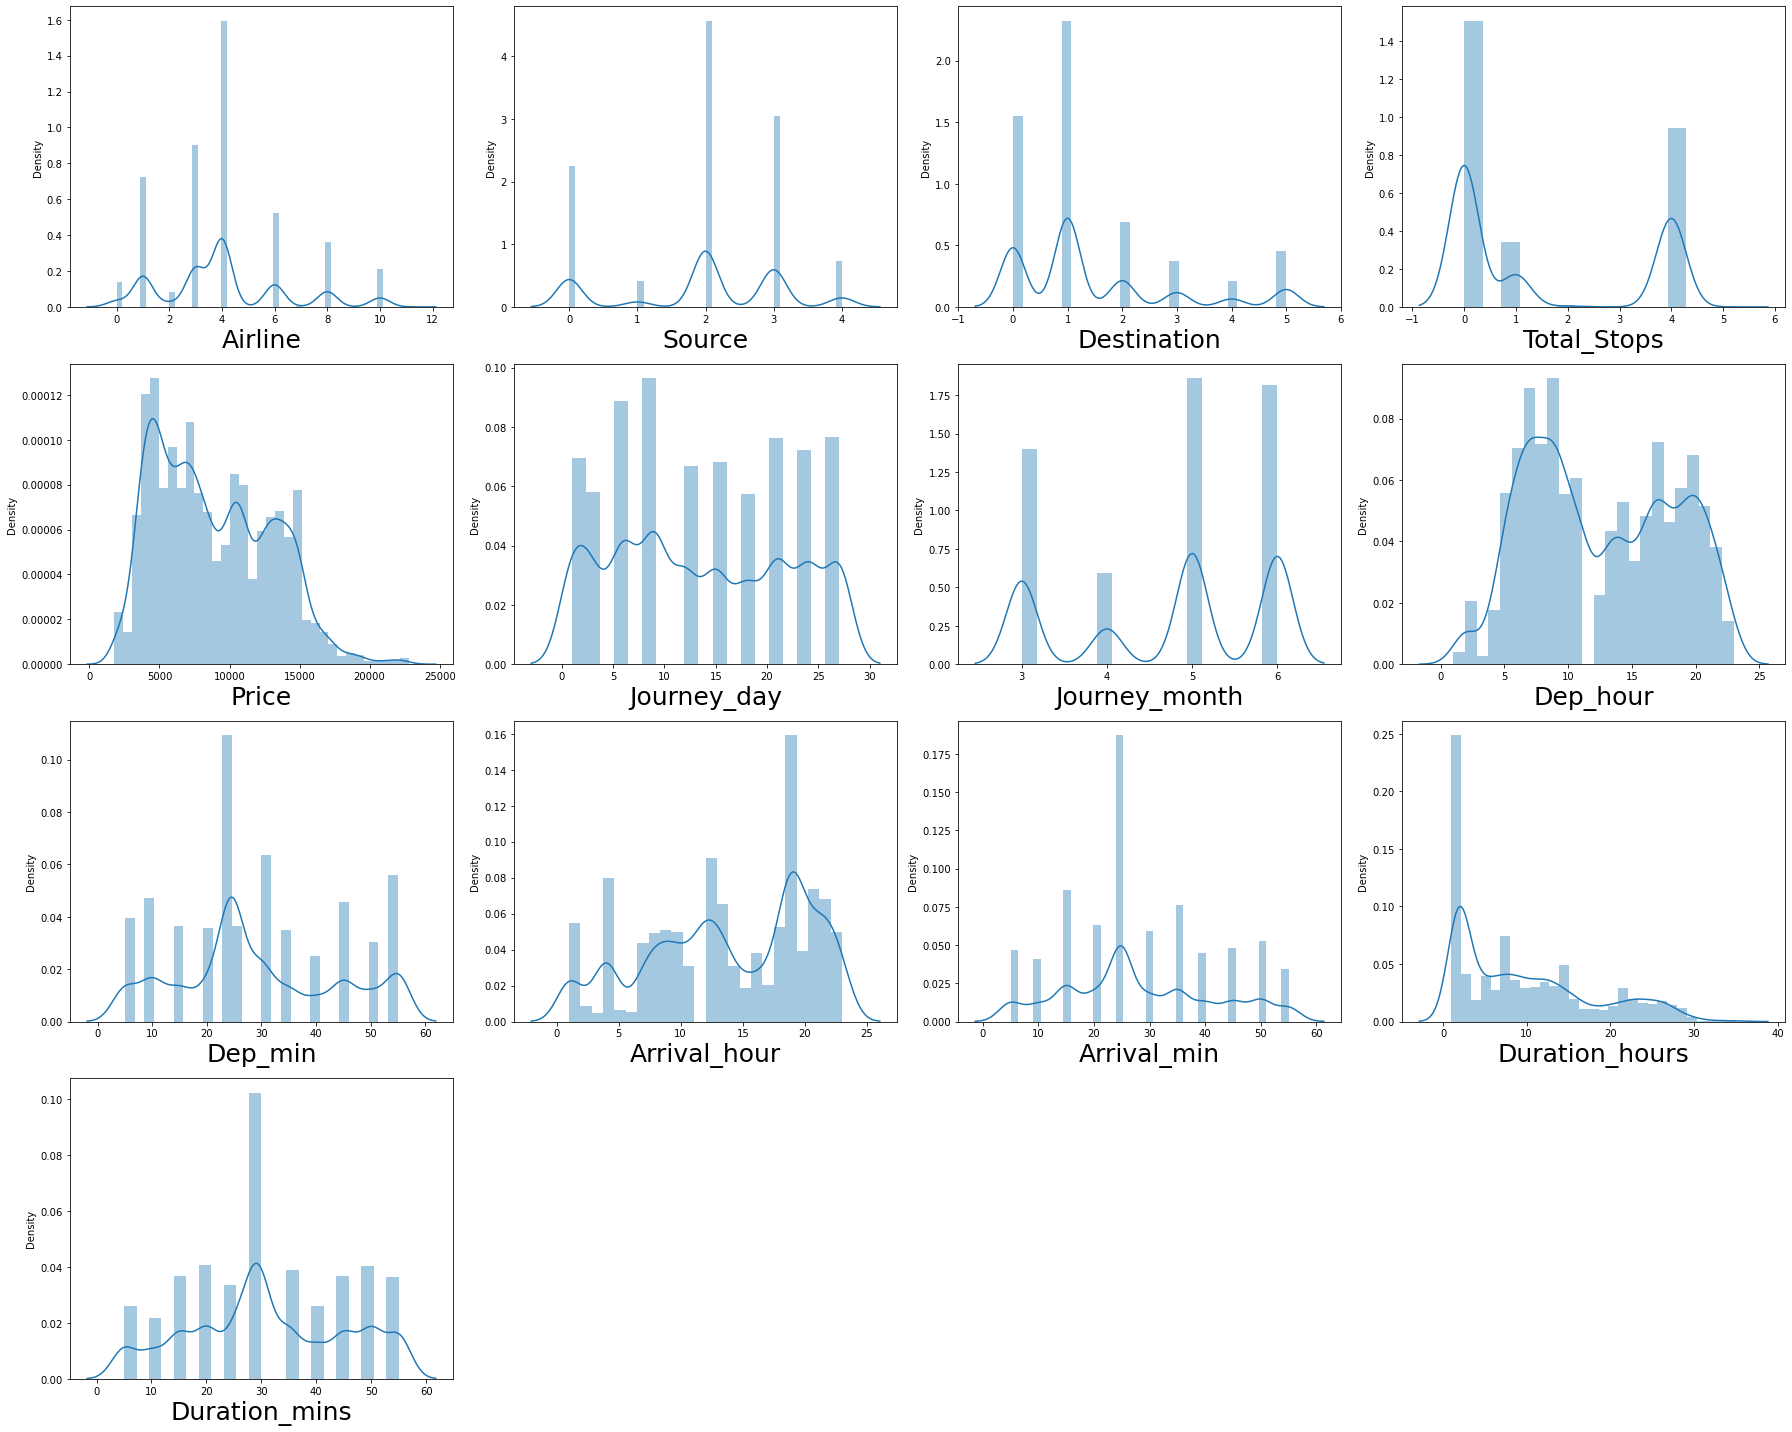

In [30]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

### Hence After Rmoving Outliers I make distribution plot which shows few outliers are removed.

# Finding correlation of features vs target using corrwith

In [31]:
df.drop('Price',axis=1).corrwith(df.Price)

Airline          -0.039108
Source            0.074091
Destination      -0.168895
Total_Stops      -0.625514
Journey_day      -0.122065
Journey_month    -0.055200
Dep_hour          0.005681
Dep_min           0.016158
Arrival_hour     -0.012796
Arrival_min      -0.034110
Duration_hours    0.575580
Duration_mins    -0.129253
dtype: float64

### Visualize the correlation

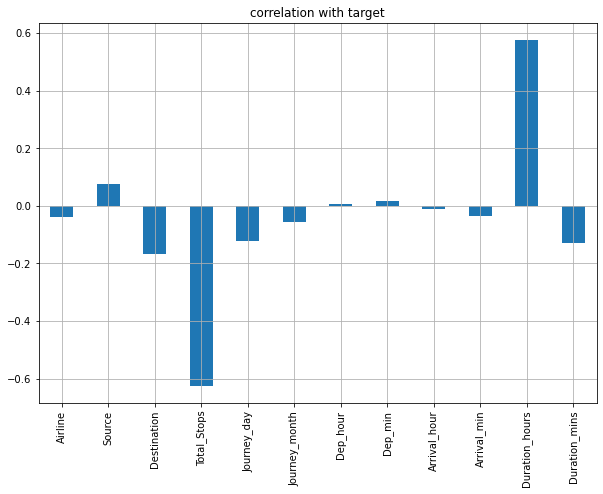

In [32]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 4 columns are positively related to target value.

# Correlation

#### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.
Denoted by r, it takes values between -1 and +1.

In [33]:
df.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.013132,0.018102,0.034421,-0.039108,0.025617,0.023330,-0.043002,-0.035710,0.039976,-0.060182,-0.140225,-0.033171
Source,-0.013132,1.000000,-0.581429,-0.233987,0.074091,-0.010309,0.170298,0.049829,-0.075222,0.030540,0.006651,0.177050,-0.239025
Destination,0.018102,-0.581429,1.000000,0.354662,-0.168895,-0.017736,-0.350030,-0.069471,0.104596,-0.036260,-0.009612,-0.273770,0.064265
Total_Stops,0.034421,-0.233987,0.354662,1.000000,-0.625514,0.022327,-0.031731,0.045891,-0.024210,-0.035787,0.107899,-0.632949,0.187937
Price,-0.039108,0.074091,-0.168895,-0.625514,1.000000,-0.122065,-0.055200,0.005681,0.016158,-0.012796,-0.034110,0.575580,-0.129253
Journey_day,0.025617,-0.010309,-0.017736,0.022327,-0.122065,1.000000,-0.056411,-0.006387,-0.001678,-0.000633,-0.009021,-0.026403,-0.002494
Journey_month,0.023330,0.170298,-0.350030,-0.031731,-0.055200,-0.056411,1.000000,0.033190,-0.043360,-0.006799,-0.040664,0.026721,-0.026248
Dep_hour,-0.043002,0.049829,-0.069471,0.045891,0.005681,-0.006387,0.033190,1.000000,-0.025424,0.087471,0.043791,0.018968,-0.021834
Dep_min,-0.035710,-0.075222,0.104596,-0.024210,0.016158,-0.001678,-0.043360,-0.025424,1.000000,0.020261,-0.028669,0.028039,0.021080
Arrival_hour,0.039976,0.030540,-0.036260,-0.035787,-0.012796,-0.000633,-0.006799,0.087471,0.020261,1.000000,-0.035302,0.002238,-0.066830


#### Now I am finding the correlation value of each column, this value is categorized into mainly 2 parts that are:
##### Positive correlated value
##### Negative correlated value The most the value is positive means that column is much co related and vice versa.

# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

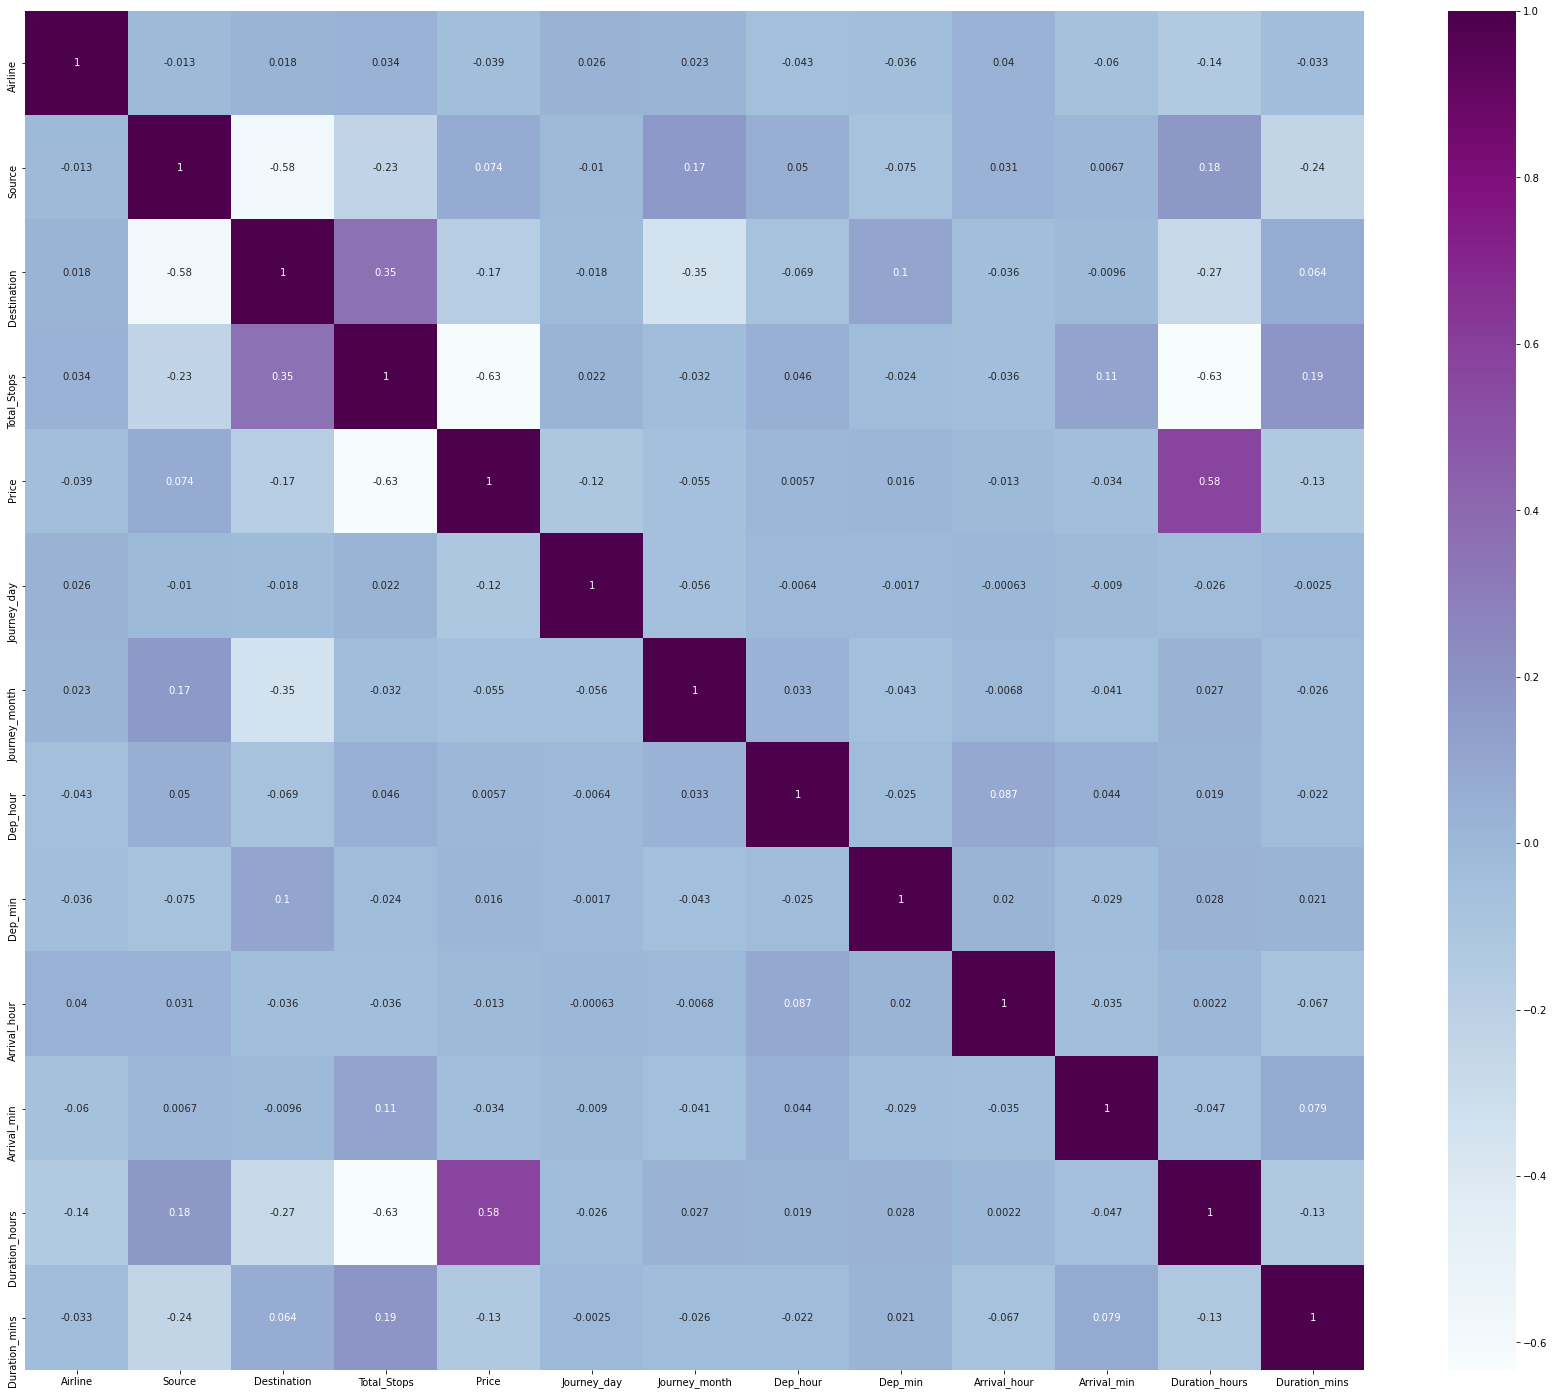

In [34]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True,cmap='BuPu')
plt.plot()

## Machine Learning

In [120]:
# dividing features and label

x = df.drop('Price',axis=1)
y = df.Price

#### Dividing features and label into x and y for model prediction.

## StandardScaler

In [123]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.41906359, -1.6635947 ,  2.45725222, ..., -1.34701889,
        -0.96458196,  1.33903437],
       [-1.26259169,  0.87514407, -0.97017273, ..., -0.97490383,
        -0.34979   , -0.42238521],
       [ 0.00270047,  0.02889782, -0.28468774, ..., -0.23067373,
         1.12571072, -0.19612621],
       ...,
       [ 0.00270047, -1.6635947 ,  0.40079725, ..., -0.60278878,
        -0.84162357, -0.19612621],
       [ 2.53328479, -1.6635947 ,  2.45725222, ..., -1.34701889,
        -0.96458196,  0.63446653],
       [-1.26259169,  0.02889782, -0.28468774, ..., -0.97490383,
        -0.2268316 , -0.77466913]])

#### Applying the standard scaler to scaled the dataset in one range.

## VIF - variance inflation factor

In [125]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.035785,Airline
1,1.616311,Source
2,1.913157,Destination
3,1.864706,Total_Stops
4,1.008487,Journey_day
5,1.167426,Journey_month
6,1.026034,Dep_hour
7,1.019610,Dep_min
8,1.018040,Arrival_hour
9,1.028923,Arrival_min


#### None of the features vif score value is above 5. So i can say that Multicollinearity doesn't exist.

## Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting Next_Tmax label first, I have used these Algorithmns for Model Building:
##### a)Linear Regression model
##### b)Random Forest Regressor Model
##### c)Decision Tree Regressor Model
##### d)AdaBoost Regressor

#### Train Test Split

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Using the train test split to divide the datset into training and testing dataset.

# AdaBoost Regressor

#### An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.
#### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [127]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

#### First I have to fit the Training data of AdaBoostRegressor.

In [128]:
# adjusted r2 score
ada.score(x_train,y_train)

0.6181876962948986

In [129]:
ada.score(x_test,y_test)

0.6163718345512839

In [130]:
y_pred = ada.predict(x_test)
y_pred

array([ 6264.72053232, 10070.23086344,  9787.12922869, ...,
       10826.70451389, 12336.15224433,  6587.65213178])

# Scatter plot of AdaBoost Regressor Model

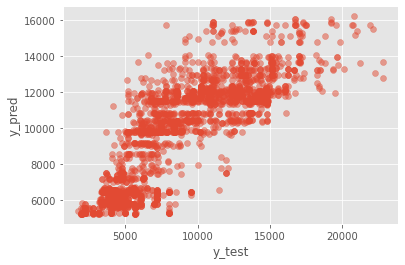

In [131]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [132]:
mean_squared_error(y_test,y_pred)

6399089.4302120805

# RMSE

In [133]:
np.sqrt(mean_squared_error(y_test,y_pred))

2529.642154576825

# r2 score

In [134]:
r2_score(y_test,y_pred)

0.6163718345512839

## AdaBoost Regressor : 61.63%

#### In prediction AdaBoost Regressor Model with Price:
##### I had done this prediction by taking Price as an output variable which is continuity in nature so that why I’m using the regression technique.
##### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
##### After calculating adjusted R2 score I used Scatter plot of AdaBoost Regressor Model,MSE,and RMSE I got r2 score of AdaBoost Regressor Model - 61.63%.

# Random Forest Regressor Model

#### Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [135]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

#### First I have to fit the Training data of RandomForestRegressor.

In [137]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9496953626204176

In [138]:
rf.score(x_test,y_test)

0.8115059079080543

In [139]:
y_pred = rf.predict(x_test)
y_pred

array([ 5371.07,  6294.78,  7414.17, ...,  8400.54, 11275.55,  3555.53])

# Scatter plot of Random Forest Regressor Model

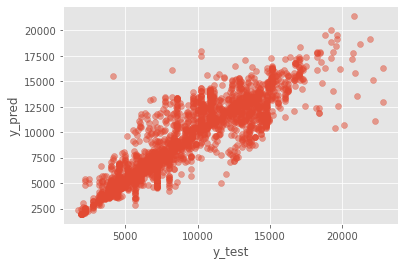

In [140]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# MSE

In [141]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

3144165.786034386

# RMSE

In [142]:
np.sqrt(mean_squared_error(y_test,y_pred))

1773.179569596488

# r2 Score

In [143]:
r2_score(y_test,y_pred)

0.8115059079080543

## Random Forest Regressor - 81.15%

### In prediction Random Forest Regressor with Price:
##### I had done this prediction by taking Price as an output variable which is continuity in nature so that why I’m using the regression technique.¶
##### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
##### After calculating adjusted R2 score I used Scatter plot of Random Forest Regressor,MSE,and RMSE I got r2 score of Random Forest Regressor - 81.15%

## Linear Regression model

#### Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

In [152]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

#### First I have to fit the Training data of LinearRegression.

In [153]:
# adjusted r2 score
rg.score(x_train,y_train)

0.4702239496995675

In [154]:
rg.score(x_test,y_test)

0.47512323589643257

In [155]:
y_pred = rg.predict(x_test)
y_pred

array([ 5232.70958778, 10824.54938157, 11591.25139819, ...,
       10937.7290581 , 10074.22637952,  5879.92278549])

### Scatter plot of Linear Regression

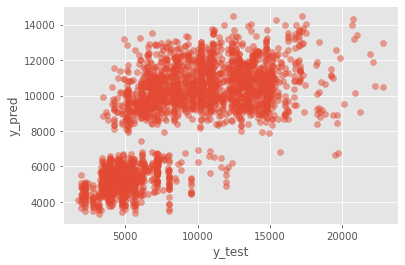

In [156]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [157]:
mean_squared_error(y_test,y_pred)

8755179.248662485

### RMSE

In [158]:
np.sqrt(mean_squared_error(y_test,y_pred))

2958.9152148485914

### r2 score

In [159]:
r2_score(y_test,y_pred)

0.47512323589643257

## Linear Regression model - 47.51%

#### In prediction Linear Regression model with Price:
##### I had done this prediction by taking Price as an output variable which is continuity in nature so that why I’m using the regression technique.
##### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
##### After calculating adjusted R2 score I used Scatter plot of Linear Regression,MSE,and RMSE I got r2 score of Linear Regression model - 47.51%

## Decision Tree Regressor Model

#### Decision tree builds regression in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [165]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [166]:
# adjusted r2 score
dt.score(x_train,y_train)

0.9629219415843084

In [167]:
dt.score(x_test,y_test)

0.7141435222351342

In [168]:
y_pred = dt.predict(x_test)
y_pred

array([ 5000.,  5883.,  6587., ...,  8937., 10577.,  3543.])

### Scatter plot of Decision Tree Regressor Model

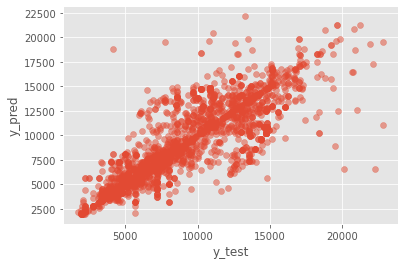

In [169]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [170]:
mean_squared_error(y_test,y_pred)

4768213.937793731

### RMSE

In [171]:
np.sqrt(mean_squared_error(y_test,y_pred))

2183.624037647903

### r2 score

In [172]:
r2_score(y_test,y_pred)

0.7141435222351342

## Decision Tree Regressor Model is 71.41%

#### In prediction Decision Tree Regressor Model with Price:
##### I had done this prediction by taking Price as an output variable which is continuity in nature so that why I’m using the regression technique.
##### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
##### After calculating adjusted R2 score I used Scatter plot of Decision Tree Regressor Model,MSE,and RMSE I got r2 score of Decision Tree Regressor Model - 71.41%

# Hyperparameter Tuning in Random Forest Regressor Model

#### After Completing All the model Prediction I Got Random Forest Regressor Model Accuracy Score is the best to do hyperparameter tuning to improve the accuracy by using Randomized Search CV.

#### Using RandomizedSearchCV method for improving the r2 score

In [173]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [174]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [175]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [176]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [177]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [178]:
prediction = rf_random.predict(x_test)

### Scatter Plot of Best Accuracy Score Model

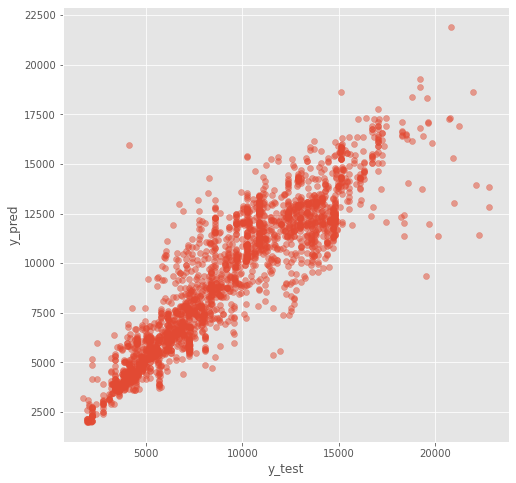

In [179]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [180]:
mean_squared_error(y_test,y_pred)

4768213.937793731

### RMSE

In [181]:
np.sqrt(mean_squared_error(y_test,y_pred))

2183.624037647903

### r2 score

In [182]:
r2_score(y_test,y_pred)

0.7141435222351342

#### In prediction HyperParameter Tuning of Random Forest Regressor with the help of Randomized Search Cv:
####  I had done this prediction by taking Next_Tmax as an output variable which is continuity in nature so that why I’m using the regression technique.
#### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
#### After calculating adjusted R2 score I used Scatter plot of Random Forest Regressor After Hypertuning ,MSE,and RMSE I got r2 score of Random Forest Regressor After Hypertuning is - 71.41%.
#### Which shows that Random Forest Regressor doesnot increase it accuracy and there is no improvement in this algorithmn.

## Regularization

#### A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
#### Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [ ]:
A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [183]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [184]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [185]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

0.028839993561399623

In [186]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.028839993561399623)

In [187]:
lasso_reg.score(x_test,y_test)

0.4751225628494279

#### I have try to improve the accuracy score by using lasso regularization 47.51% but no increase in Accuracy Value.

### Saving the Best Model

In [188]:
import pickle

In [189]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model is Random Forest Accuracy Score.
#### So I will Save the Random Forest Regressor as the Best Model.

## COCLUSION

#### The overall survey for the dynamic price changes in the flight tickets is presented. This gives the information about the highs and lows in the airfares acording to the days, weekend and time of the day that is morning, evening and night. Also the machine learning models in the computational intelligence feild that are evaluated before on different datasets are studied. Their accuracy and performances are evaluated and compared in order to get better result. For the prediction of the ticket prices perfectly differnt prediction models are tested for the better prediction accuracy. As the pricing models of the company are developed in order to maximize the revenue management. So to get result with maximum accuracy regression analysis is used. From the studies , the feature that influences the prices of the ticket are to be considered. In future the details about number of availble seats can improve the performance of the model.

#### ’ll briefly discuss how I approached this problem of predicting flight price prediction.
##### a) I have flight price prediction datastet from which I had to extract information.
##### b) I have done 1 label as the dataset speaks:
       Price
##### c) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
##### d) After from all datasets, I preprocessed the data using replacing all zeros and filling all missing values.
##### e) I did exploratory data analysis on main data frame and tried to see all visualizations.
##### f) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot.
##### g) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
##### h) After from all these i split the Features & Labels into 2 parts.
##### i) On this data, I have applied our machine learning models such as Linear Regression, Random Forest Reggessor,Decision Tree Regressor and AdaBoostRegressor.
##### j) After which I found Random Forest Regressor - 81.15% has the High r2 score and best among all the models.
##### According to the above 4 model prediction the best model is Random Forest Regressor - 81.15%.